In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

<Axes: >

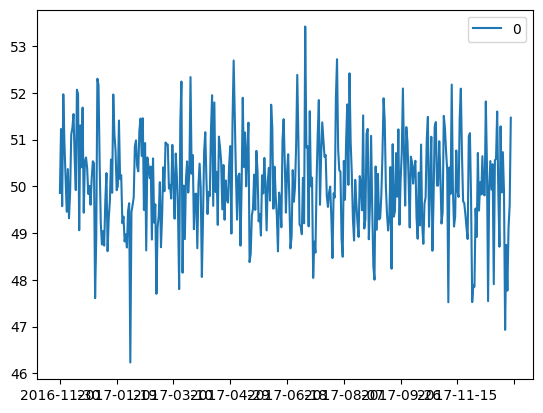

In [ ]:
df = pd.read_csv('/content/serie.csv', index_col=0)
df.head

df.plot()

In [ ]:
res = adfuller(df)
res[1] < 0.05

True

Si es estacionaria pues su comportamiento no es tan volatil y los coeficientes cuadran

In [ ]:
modelo = df.mean()

<Axes: >

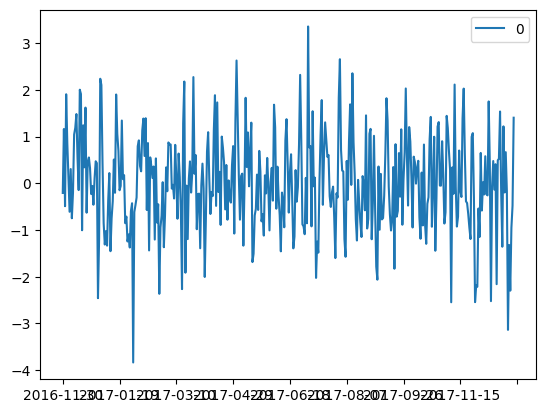

In [ ]:
residuos = df - modelo

In [ ]:
df_autocorrelacion = pd.DataFrame(residuos, index=df.index)
for i in range(1, 4):
  df_autocorrelacion['lag_' + str(i)] = residuos.shift(i)
df_autocorrelacion = df_autocorrelacion.dropna()
df_autocorrelacion

,0,lag_1,lag_2,lag_3
2016-12-03,1.903835,-0.490811,1.160368,-0.207546
2016-12-04,0.854256,1.903835,-0.490811,1.160368
2016-12-05,0.153184,0.854256,1.903835,-0.490811
2016-12-06,-0.610160,0.153184,0.854256,1.903835
2016-12-07,0.303629,-0.610160,0.153184,0.854256
...,...,...,...,...
2017-12-28,-1.320994,-3.137270,-0.165895,0.665189
2017-12-29,-2.298056,-1.320994,-3.137270,-0.165895
2017-12-30,-0.954120,-2.298056,-1.320994,-3.137270
2017-12-31,-0.480599,-0.954120,-2.298056,-1.320994


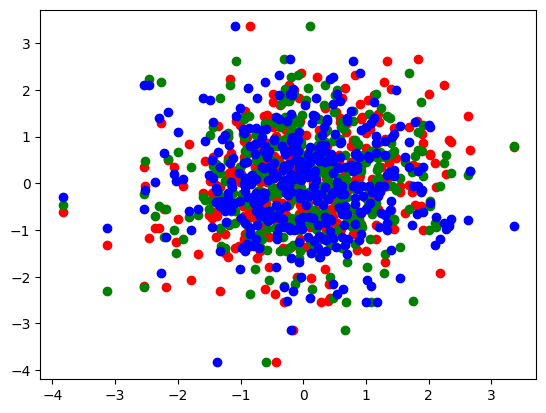

In [ ]:
# prompt: Realiza una regresion lineal utilizando a y como la columna "0" de df_autocorrelacion y los x como las otras 3 columnas utilizando plt y sklearn pinta cada columna de color diferente

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Create the X and y matrices
X = df_autocorrelacion[['lag_1', 'lag_2', 'lag_3']]
y = df_autocorrelacion['0']

# Fit the model
model.fit(X, y)

# Plot the data and the regression line
plt.scatter(X['lag_1'], y, color='red')
plt.scatter(X['lag_2'], y, color='green')
plt.scatter(X['lag_3'], y, color='blue')

# Show the plot
plt.show()


In [ ]:
# prompt: Halla los coeficientes de cada uno de los lags

model.coef_


array([ 0.22895758, -0.01187656, -0.05972693])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Esta celda se encarga de hacer todo lo que hicims en la clase, se encarga de hallar los promedios y los shift para posteriormente
#y hallar una regresion decuada

model = ARIMA(df, order=(0, 0, 3))

#Explicacion de order, (lags modelo AR, Diferencias, Lags Modelo MA (predecir los errores))
#El numero de lags del modelo auto regresivo, es decir no usamos modelos de ese tipo
#Quiere decir que no estamos haciendo ninguna diferencia
#Quiere decir la cantidad de lags que vamos a usar del MA

model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  398
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -567.791
Date:                Tue, 21 May 2024   AIC                           1145.583
Time:                        17:12:06   BIC                           1165.515
Sample:                    11-30-2016   HQIC                          1153.478
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0676      0.060    831.851      0.000      49.950      50.186
ma.L1          0.2310      0.054      4.262      0.000       0.125       0.337
ma.L2          0.0422      0.051      0.830      0.4

In [ ]:
df_autocorrelacionII = pd.DataFrame(df, index=df.index)
for i in range(1, 3):
  df_autocorrelacionII['lag_' + str(i)] = df.shift(i)
df_autocorrelacionII = df_autocorrelacionII.dropna()
df_autocorrelacionII

,0,lag_1,lag_2
2016-12-02,49.576156,51.227335,49.859422
2016-12-03,51.970802,49.576156,51.227335
2016-12-04,50.921224,51.970802,49.576156
2016-12-05,50.220151,50.921224,51.970802
2016-12-06,49.456807,50.220151,50.921224
...,...,...,...
2017-12-28,48.745973,46.929698,49.901073
2017-12-29,47.768912,48.745973,46.929698
2017-12-30,49.112847,47.768912,48.745973
2017-12-31,49.586368,49.112847,47.768912


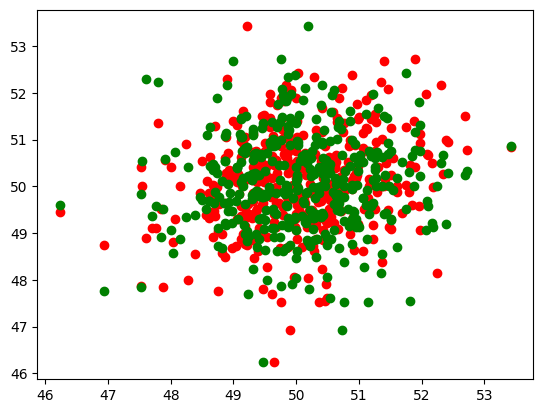

In [ ]:
model = LinearRegression()

# Create the X and y matrices
X = df_autocorrelacionII[['lag_1', 'lag_2']]
y = df_autocorrelacionII['0']

# Fit the model
model.fit(X, y)

# Plot the data and the regression line
plt.scatter(X['lag_1'], y, color='red')
plt.scatter(X['lag_2'], y, color='green')

# Show the plot
plt.show()

In [ ]:
model.coef_

array([ 0.22796007, -0.02457772])

In [ ]:
#Esta celda se encarga de hacer todo lo que hicims en la clase, se encarga de hallar los promedios y los shift para posteriormente
#y hallar una regresion decuada

model = ARIMA(df, order=(2, 0, 0))

#Explicacion de order, (lags modelo AR, Diferencias, Lags Modelo MA (predecir los errores))
#El numero de lags del modelo auto regresivo, es decir no usamos modelos de ese tipo
#Quiere decir que no estamos haciendo ninguna diferencia
#Quiere decir la cantidad de lags que vamos a usar del MA

model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  398
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -569.159
Date:                Tue, 21 May 2024   AIC                           1146.318
Time:                        17:24:15   BIC                           1162.263
Sample:                    11-30-2016   HQIC                          1152.634
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0677      0.064    787.176      0.000      49.943      50.192
ar.L1          0.2269      0.054      4.221      0.000       0.122       0.332
ar.L2         -0.0245      0.051     -0.482      0.6